In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Getting the dataset loaded in
df = pd.read_csv('data/traindata.csv')
df['ln_hrlyearn'] = np.log(df['hrlyearn'])


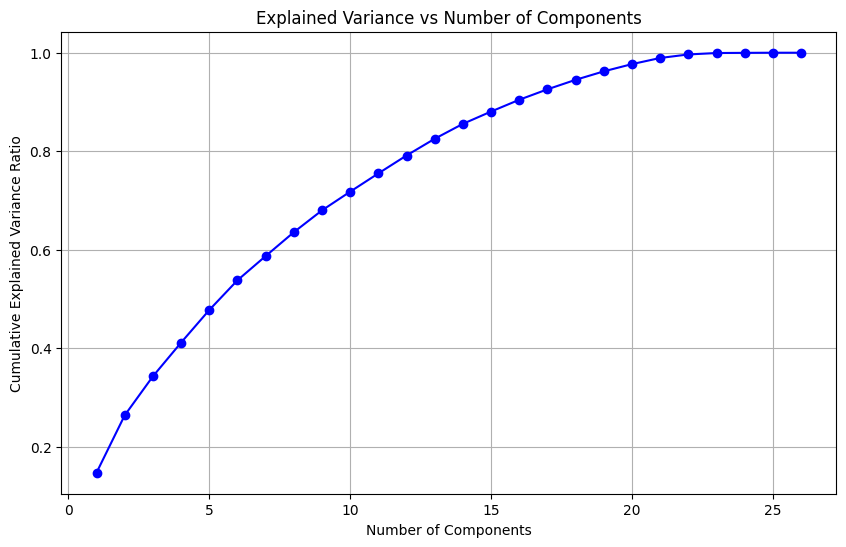


Variance explained by each component:
PC1: 0.148 (14.8%)
PC2: 0.116 (11.6%)
PC3: 0.079 (7.9%)
PC4: 0.068 (6.8%)
PC5: 0.066 (6.6%)

Top 5 contributing features for first 3 PCs:

PC1:
atothrs     0.431553
ahrsmain    0.425440
uhrsmain    0.354799
utothrs     0.348438
xtrahrs     0.244303
dtype: float64

PC2:
noc_43      0.326777
cowmain     0.320430
noc_10      0.318140
xtrahrs     0.297244
firmsize    0.285267
dtype: float64

PC3:
union       0.427646
noc_10      0.409593
noc_43      0.405782
cowmain     0.271825
firmsize    0.265790
dtype: float64


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe from the provided columns
columns = ['rec_num', 'lfsstat', 'prov', 'cma', 'age_12', 'sex', 'marstat', 'educ', 
           'mjh', 'cowmain', 'immig', 'naics_21', 'noc_10', 'noc_43', 'uhrsmain', 
           'ahrsmain', 'utothrs', 'atothrs', 'hrsaway', 'paidot', 'unpaidot', 
           'xtrahrs', 'tenure', 'hrlyearn', 'union', 'permtemp', 'estsize', 
           'firmsize', 'efamtype']

# Assuming df is your dataframe
# Create ln_hrlyearn
df['ln_hrlyearn'] = np.log(df['hrlyearn'])

# Select features for PCA (excluding rec_num, lfsstat, hrlyearn, and ln_hrlyearn)
feature_columns = [col for col in df.columns if col not in ['rec_num', 'lfsstat', 'hrlyearn', 'ln_hrlyearn']]
X = df[feature_columns]
y = df['ln_hrlyearn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a plot of explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=feature_columns
)

# Print variance explained by first few components
print("\nVariance explained by each component:")
for i, var in enumerate(explained_variance_ratio[:5], 1):
    print(f"PC{i}: {var:.3f} ({var*100:.1f}%)")

# Print top contributing features for first 3 PCs
print("\nTop 5 contributing features for first 3 PCs:")
for i in range(3):
    print(f"\nPC{i+1}:")
    pc_loadings = pd.Series(abs(pca.components_[i]), index=feature_columns)
    print(pc_loadings.nlargest(5))